In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_sample(n=100, noise=0.5):
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    true_slope = 3
    true_intercept = 4
    noise = np.random.randn(n, 1) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

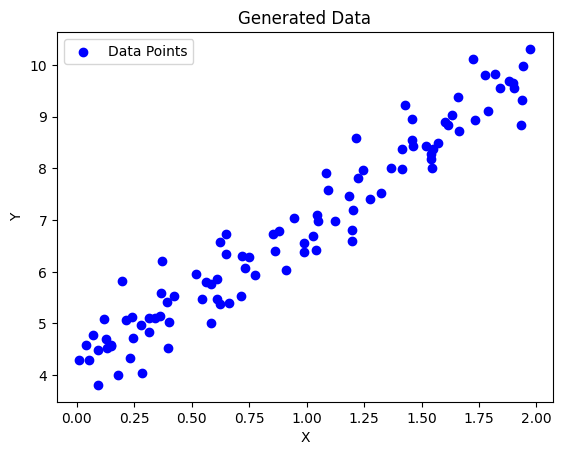

In [7]:
X, y = generate_sample()
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [8]:
def predict(X, w):
    return w[0] + w[1] * X

In [9]:
def compute_cost_function(X, y, w):
    m = len(y)
    y_pred = predict(X, w)
    return (1 / (2 * m)) * np.sum((y_pred - y) ** 2)

In [18]:
def gradient_descent(X, y, w, alpha=0.01, iterations=100):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        y_pred = predict(X, w)
        gradient_w1 = (1 / m) * np.dot(X.T, (y_pred - y))
        gradient_w0 = (1 / m) * np.sum(y_pred - y)
        
        w[1] -= alpha * gradient_w1[0]
        w[0] -= alpha * gradient_w0
        
        cost = compute_cost_function(X, y, w)
        cost_history.append(cost)
        
    return w, cost_history

In [19]:
w = np.zeros((2, 1))
alpha = 0.1
iterations = 1000

w_final, cost_history = gradient_descent(X, y, w, alpha, iterations)

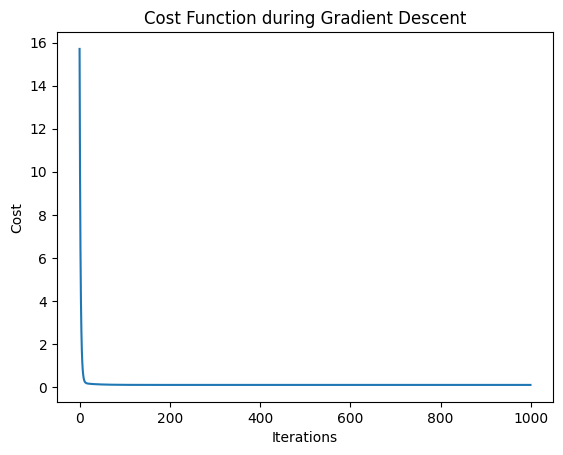

In [20]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()

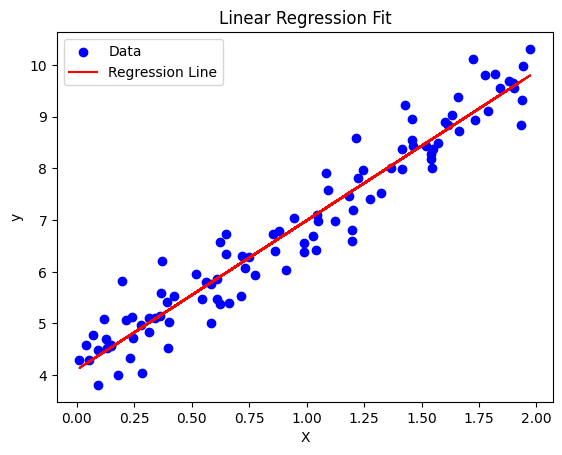

In [21]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predict(X, w_final), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [22]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

y_pred = predict(X, w_final)

rmse = compute_rms_error(y, y_pred)
print(f'RMSE: {rmse}')

RMSE: 0.4490502655513786
